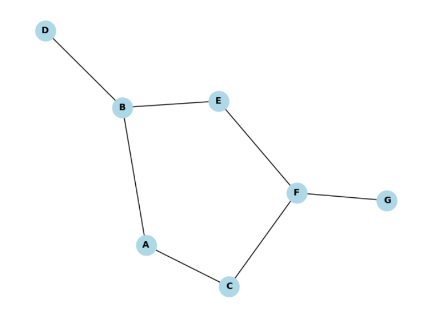

In [ ]:
GRAPH = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': ['G'],
    'G': []
}

def dfs(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return path
    if start not in graph:
        return None
    for node in graph[start]:
        if node not in path:
            new_path = dfs(graph, node, end, path)
            if new_path:
                return new_path
    return None
path = dfs(GRAPH, 'A', 'G')
if path:
    print("Path from A to G:", path)
else:
    print("No path found.")

Path from A to G: ['A', 'B', 'E', 'F', 'G']


Topological Order of Courses: ['AIM5002', 'AIM5000', 'AIM5005', 'AIM5001']


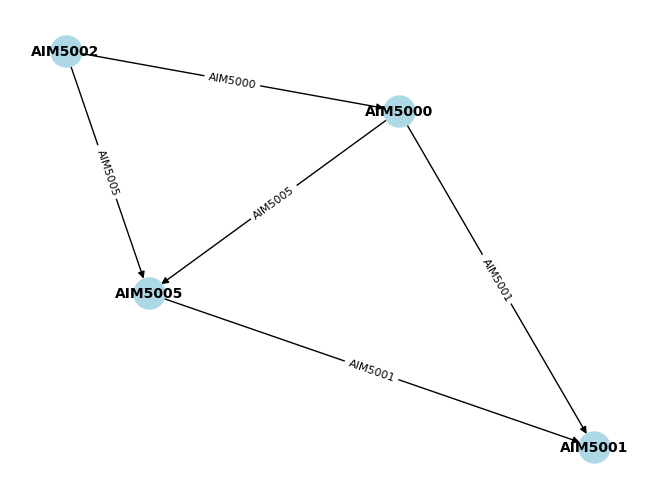

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def topological_sort(graph):
    def dfs(node):
        visited.add(node)
        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                dfs(neighbor)
        result.append(node)

    visited = set()
    result = []

    for node in graph:
        if node not in visited:
            dfs(node)

    return result[::-1]

courses = {
    'AIM5000': ['AIM5001', 'AIM5005'],
    'AIM5005': ['AIM5001'],
    'AIM5001': [],
    'AIM5002': ['AIM5000', 'AIM5005'],
}

G = nx.DiGraph(courses)
topological_order = topological_sort(courses)

if topological_order:
    print("Topological Order of Courses:", topological_order)
else:
    print("No valid topological order (contains a cycle).")

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', font_weight='bold')

labels = {}
for node in G.nodes():
    labels[node] = node
edge_labels = {(u, v): v for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()